#  Разворачивание и публикация моделей. Streamlit.

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://docs.streamlit.io/get-started
* https://colab.research.google.com/github/mrm8488/shared_colab_notebooks/blob/master/Create_streamlit_app.ipynb#scrollTo=meJ36PefNftd
* https://www.youtube.com/playlist?list=PLtqF5YXg7GLmCvTswG32NqQypOuYkPRUE
* https://docs.streamlit.io/develop/api-reference/widgets/st.slider
* https://docs.streamlit.io/develop/api-reference/media/st.image
* https://docs.streamlit.io/develop/api-reference/widgets/st.file_uploader
* https://docs.streamlit.io/develop/api-reference/caching-and-state/st.session_state

## Задачи для совместного разбора

In [1]:
# !pip install -q streamlit
# !npm install localtunnel

In [2]:
# %%writefile app.py

In [3]:
# !streamlit run /content/app.py &>/content/logs.txt &

In [4]:
# !npx localtunnel --port 8501

1\. Обсудите базовые возможности по созданию веб-приложения при помощи `streamlit` на примере построения графика функции $y=x^p, x\in[-x_{min}, x_{max}]$.

In [5]:
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def plot(x_min, x_max, power):
  x = np.linspace(x_min, x_max, 200)
  y = x ** power
  plt.figure(figsize=(10, 5))
  plt.plot(x, y)
  return plt


def main():
  st.title("Пример визуализации")

  x_min = st.sidebar.slider("Минимум", min_value=-5, max_value=5)
  x_max = st.sidebar.slider("Максимум", min_value=-5, max_value=5)
  power = st.sidebar.slider("Степень", min_value=-5, max_value=5)

  fig = plot(x_min, x_max, power)
  st.pyplot(fig)


# def main():
#   img_file = st.file_uploader(
#     label="Изображение"
#   )



  if img_file is not None:
    img = Image.open(img_file)
    st.image(img)


if __name__ == "__main__":
  main()

2024-11-14 14:16:17.994 
  command:

    streamlit run C:\Users\Danya\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-14 14:16:17.995 Session state does not function when running a script without `streamlit run`


NameError: name 'img_file' is not defined

2\. Обсудите способ загрузки изображений и хранения переменных в сессии пользователя.

In [1]:
import os
os.chdir('c:\\Users\\Danya\\Downloads')
os.getcwd()

'c:\\Users\\Danya\\Downloads'

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Напишите функцию `load_model`, которая восстанавливает модель предсказания категорий животных на основе пути к файлу с весами этой модели и любой другой дополнительной информации, которая требуется для восстановления модели. Загрузите модель и выведите ее архитектуру на экран.

- [ ] Проверено на семинаре

In [2]:
from pathlib import Path
import torch as th
import torch.nn as nn
import torch.optim as optim
device = th.device('cuda') if th.cuda.is_available() else th.device('cpu')


def load_model(weights_path: Path, freeze_layers=None, *args, **kwargs) -> nn.Module:    
    model = th.load(weights_path)
    
    return model

In [3]:
model = load_model(Path("vgg16_cat_classifier.pth"), freeze_layers=slice(0, -1)).to(device)
model

C:\Users\Danya\AppData\Local\Temp\ipykernel_18088\3884310358.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = th.load(weights_path)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

<p class="task" id="2"></p>

2\. Напишите функцию `preprocess_image`, которая принимает на вход изображение в виде `PIL.Image.Image` и предобрабатывает его таким образом, чтобы результат можно было пропустить через модель. Преобразования, применяемые к изображению, должны соответствовать тому, как данная модель была обучена.

Протестируйте работу функции, скачав картинку с котиком при помощи готовой функции `get_cat_image`.

- [ ] Проверено на семинаре

In [4]:
from torchvision import transforms as T
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

def preprocess_image(image: Image.Image):
    preprocess = T.Compose([
        T.Resize((256, 256)), 
        T.CenterCrop(224),    
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    preprocessed_image = preprocess(image).unsqueeze(0)
    return preprocessed_image

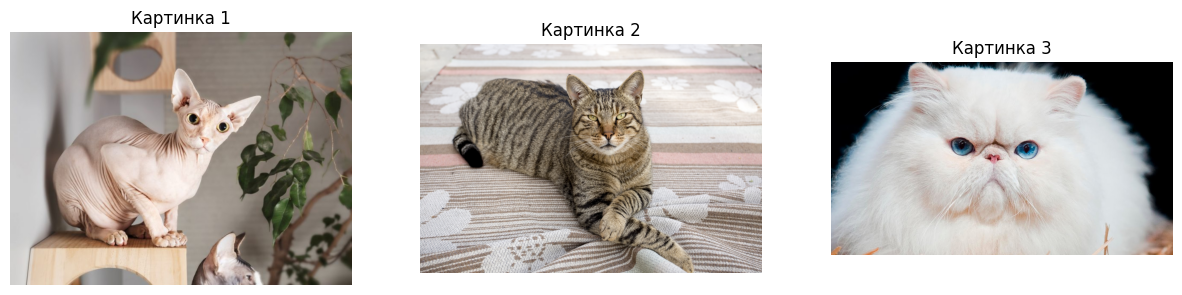

In [5]:
def get_cat_image(url: str) -> Image.Image:
    response = requests.get(url)
    if response.status_code == 200:
        image = Image.open(BytesIO(response.content))
        return image
    else:
        return None

urls = ["https://www.catster.com/wp-content/uploads/2023/11/Fawn-Sphynx_sophiecat_Shutterstock-800x592.jpg",
       "https://www.catster.com/wp-content/uploads/2024/07/tabby-cat-resting-indoor_Esin-Deniz-Shutterstock.jpg",
       'https://i.ytimg.com/vi/tseIInlZ56A/maxresdefault.jpg']

images = [get_cat_image(i).convert('RGB') for i in urls]
    
plt.figure(figsize=(15, 5))
for i, img in enumerate(images):
    plt.subplot(1, len(images), i + 1) 
    plt.imshow(img)
    plt.axis('off') 
    plt.title(f'Картинка {i + 1}')
plt.show()

In [6]:
preprocess_image(images[0])

tensor([[[[ 0.9646,  0.9474,  0.9303,  ...,  0.0398,  0.0569,  0.0569],
          [ 0.9646,  0.9474,  0.9474,  ...,  0.0227,  0.0398,  0.0398],
          [ 0.9646,  0.9474,  0.9474,  ...,  0.0227,  0.0398,  0.0398],
          ...,
          [ 1.6495,  1.6838,  1.7009,  ...,  0.0569,  0.2796,  0.3823],
          [ 1.6495,  1.6838,  1.7180,  ...,  0.2967,  0.3994,  0.4508],
          [ 1.6495,  1.7180,  1.7352,  ...,  0.4166,  0.4508,  0.4679]],

         [[ 1.1155,  1.0980,  1.0805,  ...,  0.0301,  0.0301,  0.0301],
          [ 1.1155,  1.0980,  1.0980,  ..., -0.0049,  0.0126,  0.0126],
          [ 1.1155,  1.0980,  1.0980,  ..., -0.0224, -0.0224, -0.0224],
          ...,
          [ 1.4657,  1.3606,  1.4657,  ...,  0.1176,  0.2927,  0.3452],
          [ 1.4832,  1.3782,  1.4832,  ...,  0.3452,  0.4153,  0.4503],
          [ 1.4832,  1.3957,  1.5007,  ...,  0.4503,  0.4678,  0.4853]],

         [[ 1.3677,  1.3502,  1.3328,  ...,  0.0779,  0.0953,  0.0953],
          [ 1.3677,  1.3502,  

<p class="task" id="3"></p>

3\. Напишите функцию `predict`, при помощи которой можно получить прогноз для изображения. Продемонстируйте работу функции.

- [ ] Проверено на семинаре

In [7]:
from torchvision.datasets import ImageFolder

In [8]:
def predict(model, image_tensor, classes):
    with th.no_grad():
        output = model(image_tensor.to(device))
        probabilities = nn.Softmax(dim=1)(output)
        pred_label_idx = th.argmax(probabilities, dim=1).item()
    
    pred_label = classes[pred_label_idx]
    return pred_label

In [9]:
[predict(model, preprocess_image(img), ['American Shorthair', 'Persian', 'Russian Blue', 'Tiger']) for img in images]

['Tiger', 'Tiger', 'Persian']

<p class="task" id="4"></p>

4\. Реализуйте веб-приложение, которое позволяет загрузить изображение и получить прогноз для него при помощи обученной модели. На странице должны располагаться следующие визуальные элементы:
- кнопка для загрузки изображения;
- само изображение (после загрузки);
- кнопка для получения прогнозов;
- таблица с вероятностями каждого класса (после нажатия на кнопку): должны быть видны названия классов.

Продемонстрируйте работу, вставив в ячейку скриншоты, подтверждающие корректность решения.

В этом и следующем задании использование `streamlit` является опциональным. Если вы владеете любым другим инструментом для создания веб-приложения, вы можете использовать его.

- [ ] Проверено на семинаре

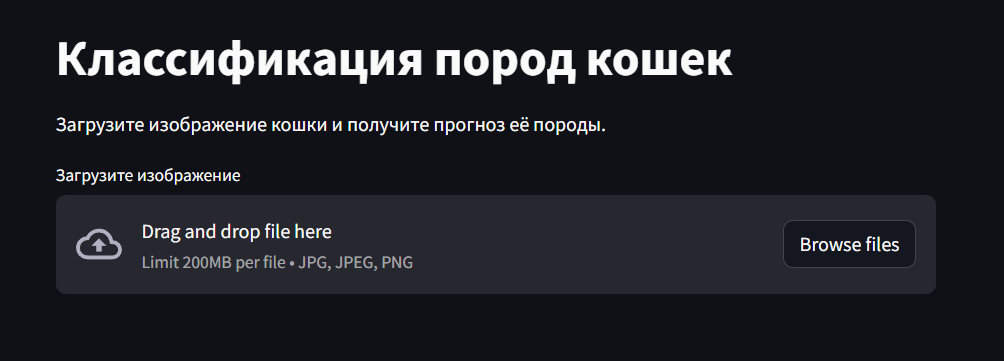

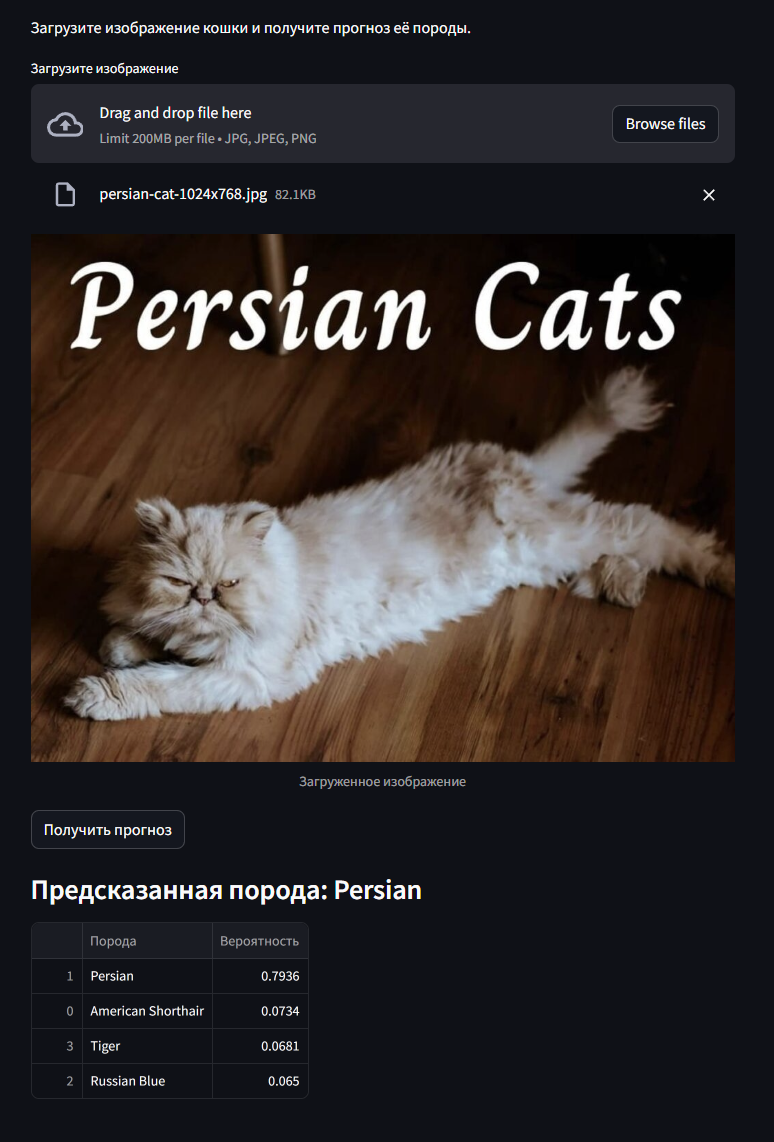

<p class="task" id="5"></p>

5\. Расширьте возможности приложения, добавив возможность отобразить информацию о топ-k наиболее вероятных классов в виде столбчатой диаграммы. Значение k должно выбираться при помощи визуального элемента "слайдер".

Продемонстрируйте работу, вставив в ячейку скриншоты, подтверждающие корректность решения.

- [ ] Проверено на семинаре


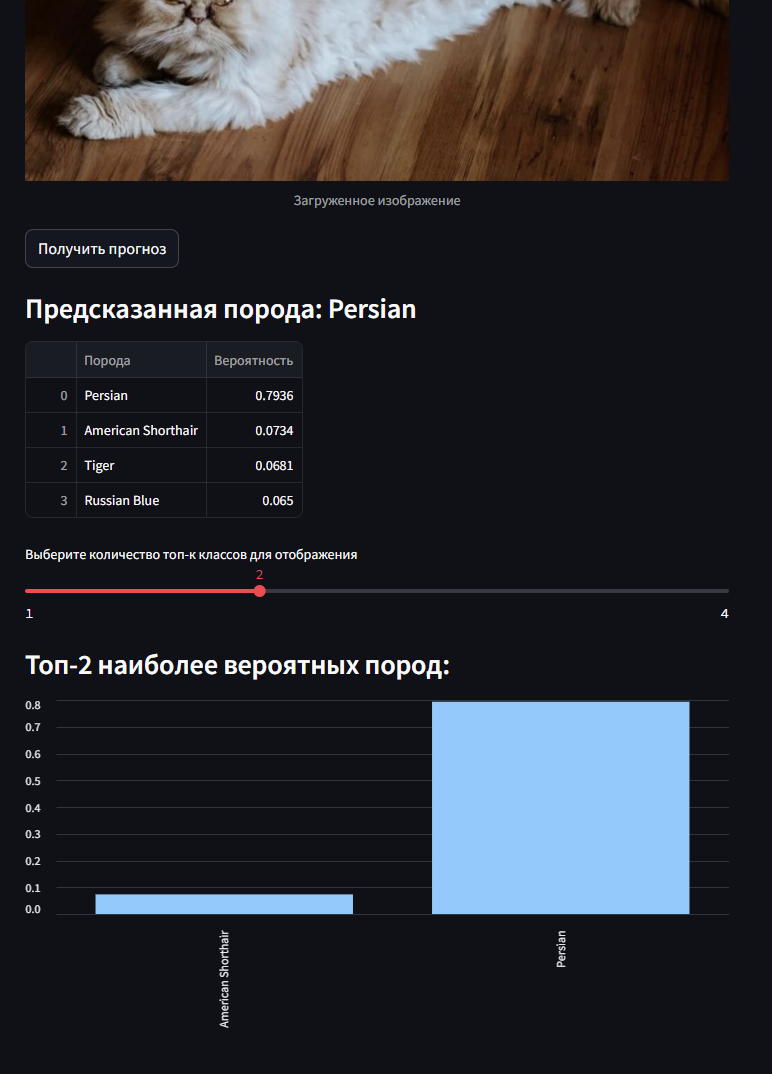

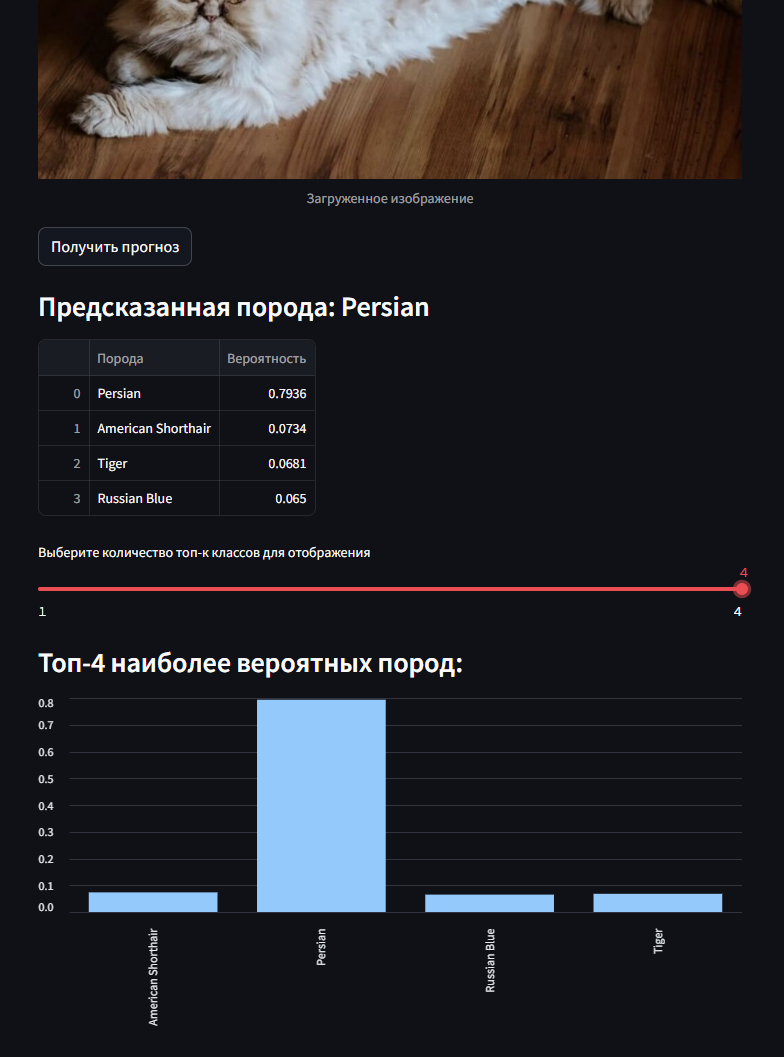